<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/CircleDetecrtionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [548]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03, random_state=42)
print(len(X), len(y))
print(X[:5])
print(y[:5])

1000 1000
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [549]:
import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
print(circles.head(10))

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0


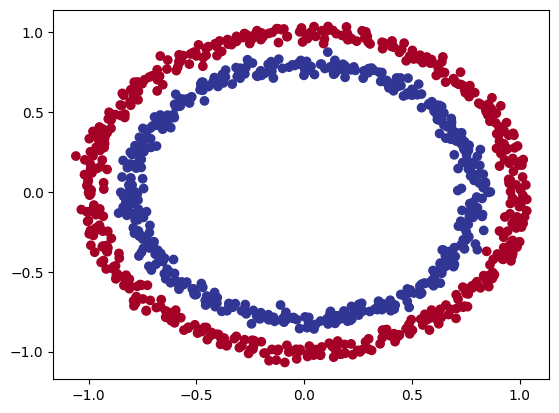

In [550]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=cm.RdYlBu)


In [551]:
print(X.shape,y.shape)
X_sample=X[0]
y_sample = y[0]
print(f"the features: {X_sample}, the label:{y_sample}")

(1000, 2) (1000,)
the features: [0.75424625 0.23148074], the label:1


In [552]:
import torch
from torch import nn

In [553]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [554]:
X[:5],y[:5], X.dtype, y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

In [555]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train),len(y_train),len(X_test),len(y_test))

800 800 200 200


In [556]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [557]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #self.layer_1 = nn.Linear(in_features=2, out_features = 5) #takes 2 features and scale up with 5 features
    #self.leyer_2 = nn.Linear(in_features = 5, out_features=1) #takes 5 features ane end up with 1 feature as y
    self.two_linear_layers = nn.Sequential(nn.Linear(in_features=2, out_features = 5),nn.Linear(in_features = 5, out_features=1)).to(device)
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0,device,next(model_0.parameters()).device

(CircleModelV0(
   (two_linear_layers): Sequential(
     (0): Linear(in_features=2, out_features=5, bias=True)
     (1): Linear(in_features=5, out_features=1, bias=True)
   )
 ),
 'cpu',
 device(type='cpu'))

In [558]:
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features = 5),nn.Linear(in_features = 5, out_features=1)).to(device)
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [559]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"legth of predictions: {len(untrained_preds)}, Shape {untrained_preds.shape}")
print(f"lenth of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f" let's see the first 10 preds {untrained_preds[:10]}")

legth of predictions: 200, Shape torch.Size([200, 1])
lenth of test samples: 200, shape: torch.Size([200, 2])
 let's see the first 10 preds tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])


In [560]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [561]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct/len(y_pred)*100
  return acc


In [562]:
model_0.eval()
with torch.inference_mode():
  y_logist = model_0(X_test.to(device)[:5])
y_logist

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [563]:
y_pred_probs = torch.sigmoid(y_logist)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [564]:
torch.round(y_pred_probs)
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [565]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} loss: {loss}, Acc: {acc}%, test acc: {test_acc}%")

Epoch: 0 loss: 0.6979604959487915, Acc: 51.87500000000001%, test acc: 57.99999999999999%
Epoch: 10 loss: 0.6958984136581421, Acc: 51.24999999999999%, test acc: 53.0%
Epoch: 20 loss: 0.6949015855789185, Acc: 51.625%, test acc: 49.5%
Epoch: 30 loss: 0.6943498253822327, Acc: 51.125%, test acc: 49.5%
Epoch: 40 loss: 0.6940091848373413, Acc: 50.875%, test acc: 51.0%
Epoch: 50 loss: 0.6937822103500366, Acc: 50.24999999999999%, test acc: 50.0%
Epoch: 60 loss: 0.6936231255531311, Acc: 50.0%, test acc: 51.5%
Epoch: 70 loss: 0.6935079097747803, Acc: 50.24999999999999%, test acc: 51.0%
Epoch: 80 loss: 0.693422257900238, Acc: 49.875%, test acc: 50.0%
Epoch: 90 loss: 0.6933572888374329, Acc: 49.875%, test acc: 53.0%
Epoch: 100 loss: 0.6933070421218872, Acc: 49.25%, test acc: 53.0%
Epoch: 110 loss: 0.6932673454284668, Acc: 49.75%, test acc: 54.0%
Epoch: 120 loss: 0.6932353377342224, Acc: 50.24999999999999%, test acc: 53.0%
Epoch: 130 loss: 0.6932090520858765, Acc: 49.75%, test acc: 55.00000000000001

In [566]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


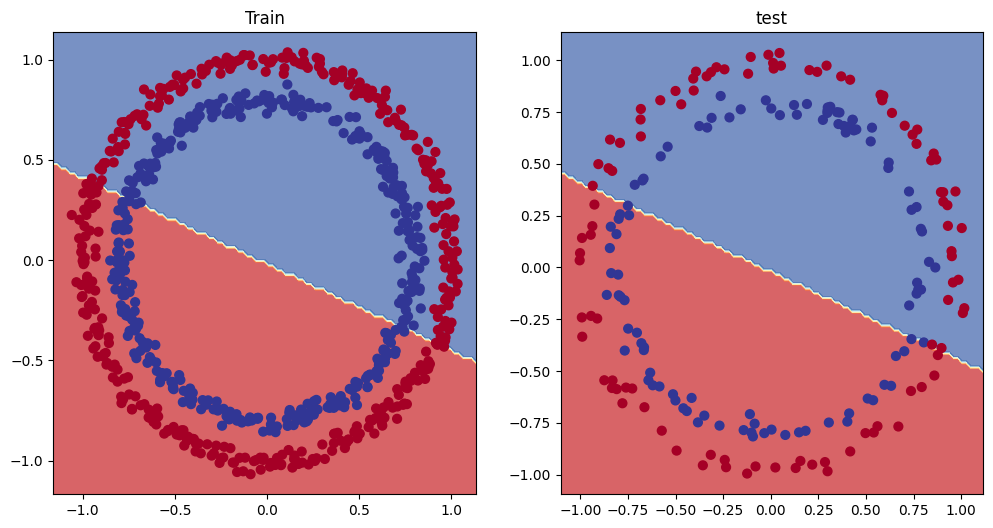

In [567]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)


In [568]:
# try to improve the model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [569]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [570]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} loss: {loss}, Acc: {acc}%, test acc: {test_acc}%")

Epoch: 0 loss: 0.6939550638198853, Acc: 50.875%, test acc: 51.0%
Epoch: 10 loss: 0.6936882138252258, Acc: 50.24999999999999%, test acc: 50.0%
Epoch: 20 loss: 0.6935124397277832, Acc: 50.125%, test acc: 49.5%
Epoch: 30 loss: 0.6933860778808594, Acc: 50.5%, test acc: 48.0%
Epoch: 40 loss: 0.6932918429374695, Acc: 50.375%, test acc: 49.0%
Epoch: 50 loss: 0.6932204365730286, Acc: 49.875%, test acc: 50.0%
Epoch: 60 loss: 0.6931658387184143, Acc: 49.375%, test acc: 51.5%
Epoch: 70 loss: 0.693123996257782, Acc: 49.375%, test acc: 50.5%
Epoch: 80 loss: 0.693091869354248, Acc: 50.125%, test acc: 50.0%
Epoch: 90 loss: 0.6930670142173767, Acc: 50.5%, test acc: 48.5%
Epoch: 100 loss: 0.6930477619171143, Acc: 50.375%, test acc: 48.0%
Epoch: 110 loss: 0.69303297996521, Acc: 50.875%, test acc: 46.5%
Epoch: 120 loss: 0.6930214762687683, Acc: 50.74999999999999%, test acc: 46.5%
Epoch: 130 loss: 0.6930124759674072, Acc: 50.625%, test acc: 46.0%
Epoch: 140 loss: 0.6930054426193237, Acc: 51.0%, test acc: 

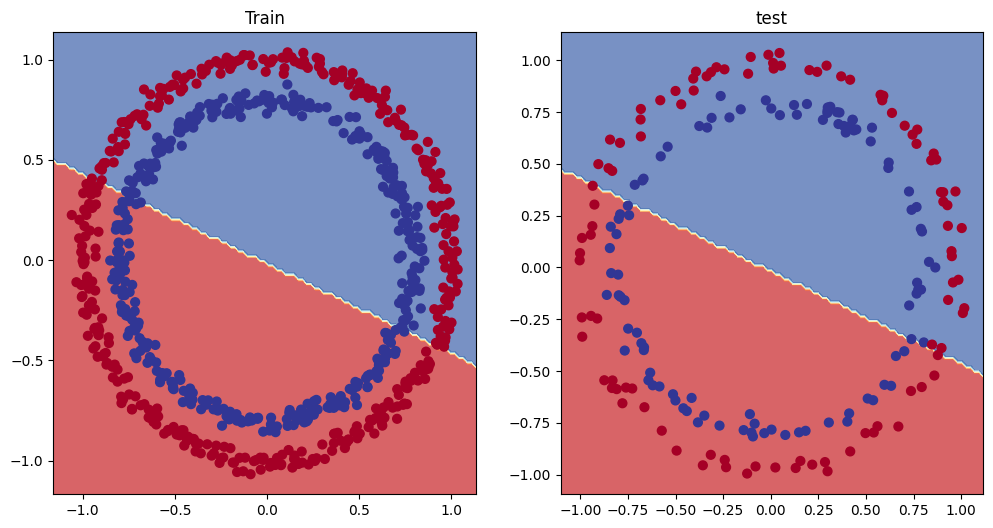

In [571]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)


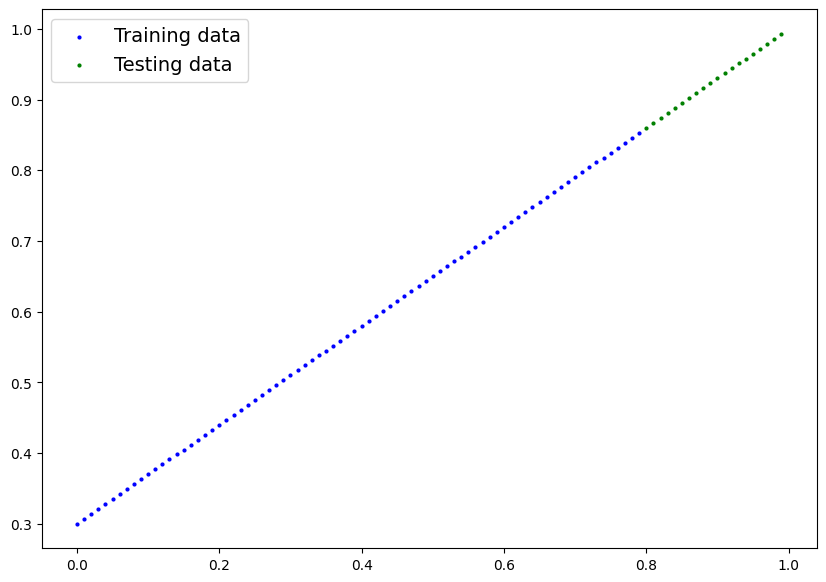

In [572]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
plot_predictions(X_train_regression,y_train_regression,X_test_regression,y_test_regression)

In [573]:
# same architecture as model_1 but using nn.seq (I am trying to check if my model working in regression issue)
model_2 = nn.Sequential(nn.Linear(in_features=1, out_features=10),
                                  nn.Linear(in_features=10, out_features=10),
                                  nn.Linear(in_features=10, out_features=1
                                  )).to(device)
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]])),
             ('0.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549])),
             ('1.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0

In [574]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [575]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train_regression, y_train_rergession = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


In [576]:
for epoch in range(epochs):
  y_pred = model_2(X_train_regression).to(device)
  loss = loss_fn(y_pred,y_train_regression.to(device))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)
  if epoch%100==0:
    print(epoch, loss, test_loss)


0 tensor(0.7599, grad_fn=<MeanBackward0>) tensor(0.9110)
100 tensor(0.0286, grad_fn=<MeanBackward0>) tensor(0.0008)
200 tensor(0.0253, grad_fn=<MeanBackward0>) tensor(0.0021)
300 tensor(0.0214, grad_fn=<MeanBackward0>) tensor(0.0031)
400 tensor(0.0196, grad_fn=<MeanBackward0>) tensor(0.0034)
500 tensor(0.0194, grad_fn=<MeanBackward0>) tensor(0.0039)
600 tensor(0.0190, grad_fn=<MeanBackward0>) tensor(0.0038)
700 tensor(0.0188, grad_fn=<MeanBackward0>) tensor(0.0038)
800 tensor(0.0184, grad_fn=<MeanBackward0>) tensor(0.0033)
900 tensor(0.0180, grad_fn=<MeanBackward0>) tensor(0.0036)


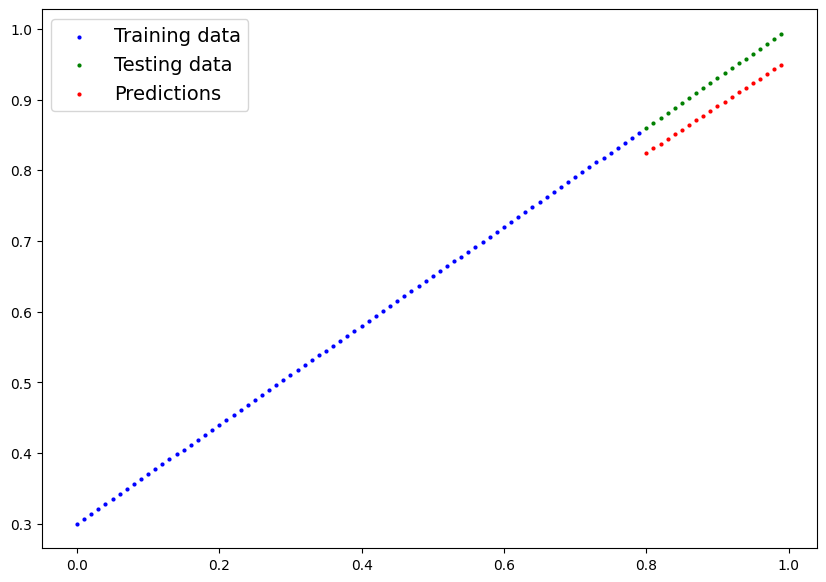

In [577]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression.to(device))
plot_predictions(X_train_regression.cpu(), y_train_rergession.cpu(), X_test_regression.cpu(), y_test_regression.cpu(),predictions=y_preds.cpu())

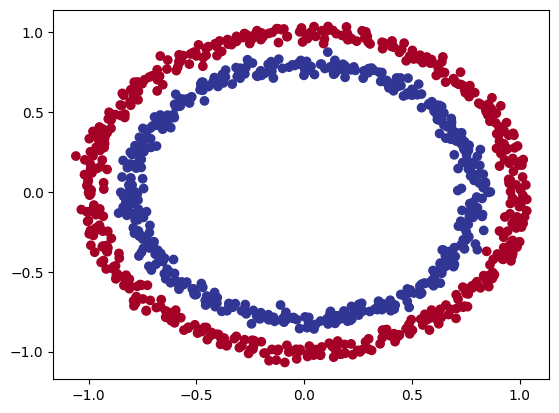

In [578]:
# that give an intiuation why the linear layers are not working in our intitial problem, so let's use the secret key here which is non_linear
X, y = make_circles(1000, noise = 0.03, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap= plt.cm.RdYlBu)

In [579]:
X = torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5], y_train[:5]
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [580]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [581]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [582]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [583]:
torch.manual_seed(42)
epochs = 1001


for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%


In [584]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()


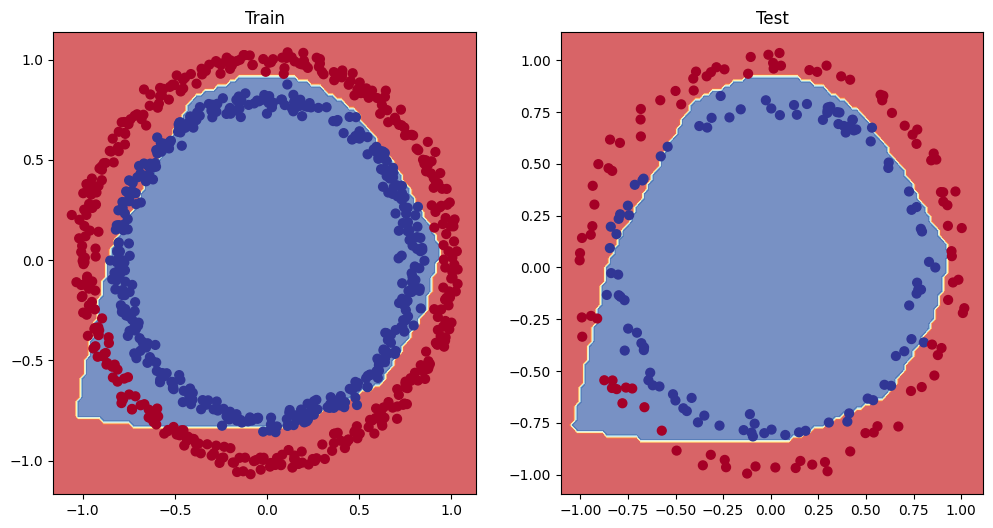

In [585]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
# I felt satisiferd here \(￣︶￣*\)) mmmmmmmmmmmm I love it \(@^0^@)/

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


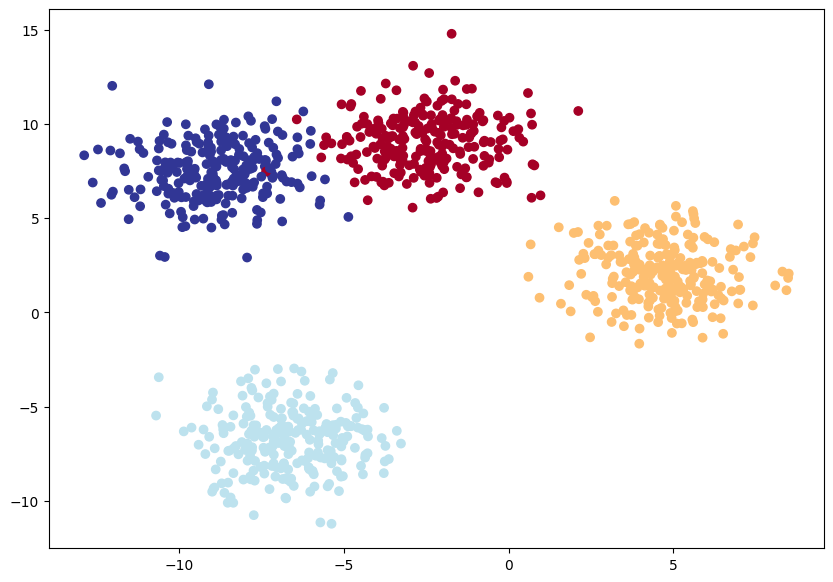

In [586]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [587]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [588]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(nn.Linear(in_features=input_features,out_features=hidden_units),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_units, out_features=hidden_units),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_units,out_features=output_features)
                                            )
  def forward(self, x):
    return self.linear_layer_stack(x)
model_4 = BlobModel(input_features=NUM_FEATURES,
                      output_features=NUM_CLASSES,
                      hidden_units=8).to(device)
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [589]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)


In [590]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [591]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [592]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1001
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

In [593]:
for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_preds)
  if epoch%10 ==0:
    print(epoch,loss,acc,test_loss,test_acc)

0 tensor(1.1588, grad_fn=<NllLossBackward0>) 40.375 tensor(1.1472) 38.5
10 tensor(1.0649, grad_fn=<NllLossBackward0>) 55.375 tensor(1.0684) 50.5
20 tensor(0.9819, grad_fn=<NllLossBackward0>) 62.625 tensor(0.9976) 57.49999999999999
30 tensor(0.9114, grad_fn=<NllLossBackward0>) 70.5 tensor(0.9360) 67.0
40 tensor(0.8529, grad_fn=<NllLossBackward0>) 88.375 tensor(0.8834) 87.5
50 tensor(0.8043, grad_fn=<NllLossBackward0>) 92.125 tensor(0.8385) 93.0
60 tensor(0.7635, grad_fn=<NllLossBackward0>) 93.625 tensor(0.7998) 94.5
70 tensor(0.7285, grad_fn=<NllLossBackward0>) 94.875 tensor(0.7659) 95.0
80 tensor(0.6977, grad_fn=<NllLossBackward0>) 95.625 tensor(0.7356) 95.0
90 tensor(0.6698, grad_fn=<NllLossBackward0>) 96.375 tensor(0.7076) 96.5
100 tensor(0.6438, grad_fn=<NllLossBackward0>) 96.875 tensor(0.6812) 97.0
110 tensor(0.6191, grad_fn=<NllLossBackward0>) 97.625 tensor(0.6557) 97.5
120 tensor(0.5952, grad_fn=<NllLossBackward0>) 97.75 tensor(0.6308) 98.0
130 tensor(0.5716, grad_fn=<NllLossBack

In [594]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[-0.6780,  5.9395, -7.5905, -8.3596],
        [-2.1669, -6.3434, -3.7333,  3.1190],
        [-3.4576, -3.9515,  3.1594, -2.6447],
        [-1.1648,  4.1631, -3.8423, -4.8279],
        [ 3.7186, -1.3747, -9.0893, -6.8788],
        [-2.8126, -7.5438, -4.3057,  3.7845],
        [-3.0717, -3.3814,  2.7903, -2.1610],
        [ 3.3605, -4.0550, -6.8668, -3.5172],
        [-4.4271, -5.0619,  3.8250, -3.4260],
        [ 3.4823, -3.0518, -7.5007, -4.6596]])

In [595]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)

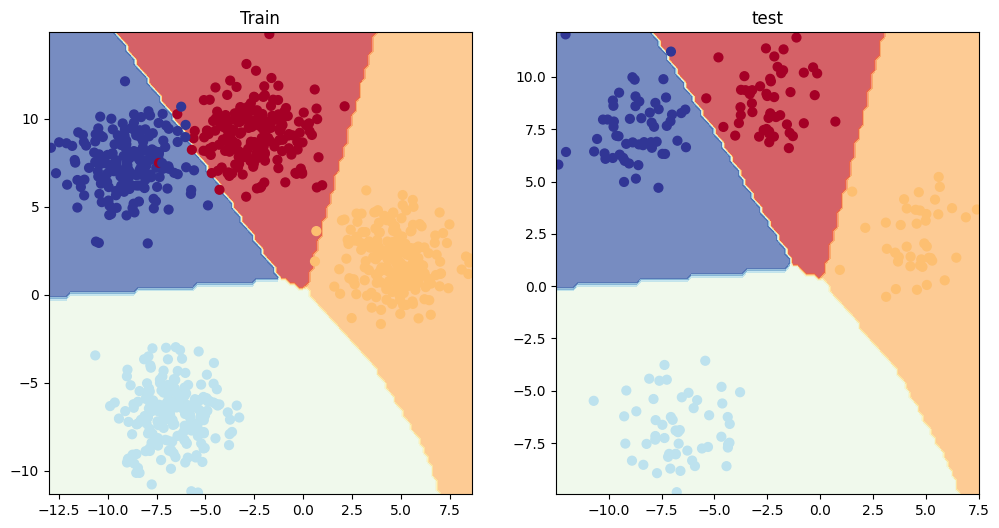

In [596]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
#AHHH satisified feelings OMG